<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/%EC%A4%91%EA%B8%89/9%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine

In [2]:
data = load_wine(as_frame=True)

In [3]:
wine = data.frame

In [5]:
from sklearn.neighbors import KNeighborsClassifier

#알고리즘 +  알파 (1. 전처리, 2. 하이퍼파라미터튜닝(학습을 통해 알수 없는 사람이 지경을 통해)

In [6]:
knn = KNeighborsClassifier(n_jobs=-1)   #cpu갯수

In [7]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#numpy : multiprocessing
n_jobs : -1 최대 CPU

In [10]:
from sklearn.model_selection import cross_val_score

In [18]:
temp = []
for i in range(3, 21, 2):
  for j in {'uniform', 'distance'}:
    knn = KNeighborsClassifier(n_neighbors=i, weights=j)
    temp.append(cross_val_score(knn, wine.iloc[:,:-1], wine.target, cv=10).mean())

In [19]:
temp

[0.7428104575163398,
 0.7209150326797384,
 0.7209150326797387,
 0.6754901960784313,
 0.7261437908496732,
 0.669607843137255,
 0.7316993464052287,
 0.6977124183006536,
 0.7313725490196077,
 0.7143790849673202,
 0.7202614379084966,
 0.6918300653594771,
 0.7202614379084966,
 0.7199346405228757,
 0.7258169934640522,
 0.6973856209150326,
 0.7313725490196078,
 0.7032679738562091]

# gridsearch + cv
- hyperparameter를 grid mapping 후
- 전체 탐색
- 가장 좋은 성능 좋은 grid 활용

In [20]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors':range(3,21,2),'n_neighbors':range(3,21,2),
                                                        'weights' : ['uniform', 'distance']}, cv=10)

In [23]:
grid.fit(wine.iloc[:,:-1], wine.target)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 21, 2),
                         'weights': ['uniform', 'distance']})

In [24]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [25]:
grid.best_index_

1

In [26]:
grid.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [27]:
grid.best_score_

0.7428104575163398

In [28]:
grid.cv_results_

{'mean_fit_time': array([0.0035295 , 0.00305698, 0.00308499, 0.00323768, 0.00339766,
        0.00335498, 0.00380096, 0.00358727, 0.00311265, 0.00329957,
        0.00311892, 0.00201235, 0.00200067, 0.00203204, 0.00201883,
        0.00197468, 0.00203369, 0.00301862]),
 'std_fit_time': array([9.10657400e-04, 1.46886219e-04, 8.41144802e-05, 2.76161606e-04,
        1.50573510e-04, 8.37174973e-04, 8.05512017e-04, 8.90320530e-04,
        1.89625560e-04, 2.18026463e-04, 4.52905283e-04, 6.13623099e-05,
        7.62405208e-05, 9.84282452e-05, 5.59990583e-05, 2.18683780e-05,
        2.53528368e-04, 3.81570803e-04]),
 'mean_score_time': array([0.00482309, 0.00339246, 0.00413203, 0.00392485, 0.00445197,
        0.00349476, 0.00541277, 0.00408382, 0.00439262, 0.00381689,
        0.00391834, 0.00237732, 0.00286386, 0.00231731, 0.00273848,
        0.00228329, 0.00314853, 0.00353613]),
 'std_score_time': array([9.78849567e-04, 1.53376027e-04, 1.08162550e-04, 6.53391673e-04,
        1.39469956e-04, 1.12

In [29]:
import pandas as pd

In [30]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003530,0.000911,0.004823,0.000979,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.666667,0.611111,0.666667,0.666667,0.666667,0.666667,0.722222,0.777778,0.882353,0.882353,0.720915,0.090626,8
1,0.003057,0.000147,0.003392,0.000153,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.777778,0.666667,0.666667,0.666667,0.666667,0.666667,0.833333,0.777778,0.882353,0.823529,0.742810,0.081004,1
2,0.003085,0.000084,0.004132,0.000108,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.666667,0.666667,0.611111,0.611111,0.611111,0.611111,0.722222,0.666667,0.823529,0.764706,0.675490,0.069908,17
3,0.003238,0.000276,0.003925,0.000653,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.722222,0.666667,0.611111,0.611111,0.666667,0.666667,0.777778,0.722222,0.882353,0.882353,0.720915,0.093970,7
4,0.003398,0.000151,0.004452,0.000139,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.666667,0.722222,0.611111,0.500000,0.611111,0.611111,0.722222,0.722222,0.823529,0.705882,0.669608,0.085061,18
5,0.003355,0.000837,0.003495,0.000112,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.722222,0.722222,0.611111,0.611111,0.666667,0.611111,0.833333,0.777778,0.882353,0.823529,0.726144,0.095555,5
6,0.003801,0.000806,0.005413,0.001666,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.722222,0.722222,0.666667,0.611111,0.611111,0.611111,0.722222,0.722222,0.764706,0.823529,0.697712,0.067959,14
7,0.003587,0.000890,0.004084,0.001333,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.722222,0.722222,0.666667,0.666667,0.611111,0.666667,0.777778,0.777778,0.882353,0.823529,0.731699,0.079237,2
8,0.003113,0.000190,0.004393,0.000430,11,uniform,"{'n_neighbors': 11, 'weights': 'uniform'}",0.777778,0.722222,0.611111,0.611111,0.666667,0.722222,0.777778,0.666667,0.764706,0.823529,0.714379,0.069635,12
9,0.003300,0.000218,0.003817,0.000556,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",0.777778,0.722222,0.666667,0.666667,0.611111,0.666667,0.777778,0.777778,0.823529,0.823529,0.731373,0.071101,4


<Axes: >

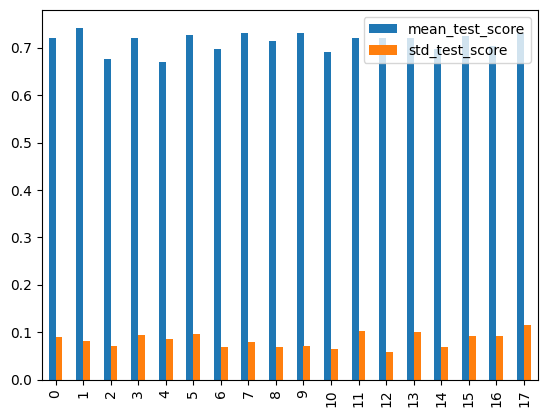

In [37]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score']].plot.bar()

<Axes: >

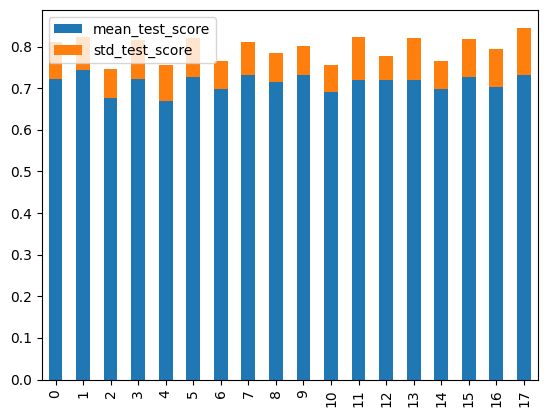

In [38]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score']].plot.bar(stacked=True)

In [31]:
from sklearn.model_selection import cross_validate, cross_val_score

In [33]:
cross_val_score(knn, wine.iloc[:,:-1], wine.target, cv=10)

array([0.72222222, 0.77777778, 0.61111111, 0.55555556, 0.61111111,
       0.66666667, 0.83333333, 0.66666667, 0.76470588, 0.82352941])

In [35]:
cross_val_score(knn, wine.iloc[:,:-1], wine.target, cv=10).mean()

0.7032679738562091

In [34]:
cross_val_score(knn, wine.iloc[:,:-1], wine.target, cv=10).std()

0.09085672610983081

In [40]:
cross_validate(knn, wine.iloc[:,:-1], wine.target, cv=10)

{'fit_time': array([0.00538802, 0.00465131, 0.00213838, 0.00206447, 0.00213361,
        0.00206327, 0.00199294, 0.00195789, 0.00278664, 0.00256205]),
 'score_time': array([0.00463128, 0.00528216, 0.00294185, 0.00280666, 0.00296402,
        0.00277948, 0.00275064, 0.00269747, 0.00290465, 0.00287652]),
 'test_score': array([0.72222222, 0.77777778, 0.61111111, 0.55555556, 0.61111111,
        0.66666667, 0.83333333, 0.66666667, 0.76470588, 0.82352941])}

In [39]:
pd.DataFrame(cross_validate(knn, wine.iloc[:,:-1], wine.target, cv=10))

,fit_time,score_time,test_score
0,0.003771,0.005097,0.722222
1,0.002741,0.003070,0.777778
2,0.002145,0.002906,0.611111
3,0.002128,0.002872,0.555556
4,0.002064,0.002792,0.611111
5,0.002763,0.003811,0.666667
6,0.002217,0.002858,0.833333
7,0.002048,0.004717,0.666667
8,0.003256,0.003880,0.764706
9,0.002216,0.002898,0.823529


# 사이킷런에서는 파이프라인 무조건 쓰는게 좋다

In [41]:
from sklearn.pipeline import Pipeline

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [43]:
pipe = Pipeline([('std', StandardScaler()),('knn', KNeighborsClassifier())])

In [44]:
pipe.get_params()

{'memory': None,
 'steps': [('std', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'std': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'std__copy': True,
 'std__with_mean': True,
 'std__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [48]:
grid = GridSearchCV(pipe, param_grid={'knn__n_neighbors':(3,21,2),
                                      'std': [StandardScaler(), MinMaxScaler()]}, cv=10)

In [49]:
grid.fit(wine.iloc[:,:-1], wine.target)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': (3, 21, 2),
                         'std': [StandardScaler(), MinMaxScaler()]})

In [50]:
grid.best_estimator_

Pipeline(steps=[('std', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=21))])

In [52]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_std,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004936,0.002525,0.003271,0.000441,3,StandardScaler(),"{'knn__n_neighbors': 3, 'std': StandardScaler()}",0.944444,0.944444,0.888889,0.944444,1.0,0.944444,1.0,1.0,0.882353,0.941176,0.949020,0.040003,3
1,0.003552,0.000054,0.003004,0.000083,3,MinMaxScaler(),"{'knn__n_neighbors': 3, 'std': MinMaxScaler()}",0.833333,0.944444,0.944444,0.944444,1.0,1.000000,1.0,1.0,0.882353,0.941176,0.949020,0.053243,3
2,0.003852,0.000160,0.003061,0.000109,21,StandardScaler(),"{'knn__n_neighbors': 21, 'std': StandardScaler()}",0.944444,1.000000,0.944444,0.944444,1.0,0.944444,1.0,1.0,1.000000,1.000000,0.977778,0.027217,1
3,0.003595,0.000372,0.003007,0.000122,21,MinMaxScaler(),"{'knn__n_neighbors': 21, 'std': MinMaxScaler()}",1.000000,1.000000,0.944444,0.944444,1.0,0.944444,1.0,1.0,0.941176,1.000000,0.977451,0.027631,2
4,0.004943,0.000429,0.004399,0.000587,2,StandardScaler(),"{'knn__n_neighbors': 2, 'std': StandardScaler()}",0.888889,0.944444,0.944444,0.944444,1.0,0.888889,1.0,1.0,0.882353,0.941176,0.943464,0.043919,5
5,0.003762,0.000409,0.003345,0.000672,2,MinMaxScaler(),"{'knn__n_neighbors': 2, 'std': MinMaxScaler()}",0.833333,0.888889,0.944444,0.944444,1.0,1.000000,1.0,1.0,0.882353,0.941176,0.943464,0.056244,5


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
grid = GridSearchCV(pipe, param_grid={'knn': [KNeighborsClassifier(), LogisticRegression()],
                                      'std': [StandardScaler(), MinMaxScaler()]}, cv=10)

In [55]:
grid.fit(wine.iloc[:,:-1], wine.target)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn': [KNeighborsClassifier(), LogisticRegression()],
                         'std': [StandardScaler(), MinMaxScaler()]})

In [56]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn,param_std,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004255,0.001098,0.003519,0.000916,KNeighborsClassifier(),StandardScaler(),"{'knn': KNeighborsClassifier(), 'std': Standar...",1.000000,0.944444,0.944444,0.944444,1.000000,0.944444,1.0,1.0,0.941176,0.941176,0.966013,0.027776,3
1,0.003794,0.000396,0.003199,0.000301,KNeighborsClassifier(),MinMaxScaler(),"{'knn': KNeighborsClassifier(), 'std': MinMaxS...",0.944444,0.888889,0.944444,0.944444,1.000000,0.944444,1.0,1.0,0.941176,0.941176,0.954902,0.033576,4
2,0.011836,0.004276,0.002467,0.000528,LogisticRegression(),StandardScaler(),"{'knn': LogisticRegression(), 'std': StandardS...",0.944444,0.944444,1.000000,0.944444,1.000000,1.000000,1.0,1.0,1.000000,1.000000,0.983333,0.025459,2
3,0.011294,0.000685,0.002256,0.000096,LogisticRegression(),MinMaxScaler(),"{'knn': LogisticRegression(), 'std': MinMaxSca...",1.000000,1.000000,0.944444,0.944444,0.944444,1.000000,1.0,1.0,1.000000,1.000000,0.983333,0.025459,1


In [57]:
grid.best_estimator_

Pipeline(steps=[('std', MinMaxScaler()), ('knn', LogisticRegression())])

## 고급 - 심화 : std, mm 안쓰고 싶다.
## 고급 - 필수 : hyperparamer까지 알고 싶다.



In [ ]:
#grid = GridSearchCV(pipe, param_grid={'knn': [KNeighborsClassifier(), LogisticRegression()],
 #                                    'n_neighbors':range(3,21,2),
  #                                    'std': [StandardScaler(), MinMaxScaler()]}, cv=10)

In [58]:
pipe = Pipeline([('preproces', StandardScaler()),('clf', KNeighborsClassifier())])

In [59]:
grid = GridSearchCV(pipe, param_grid=[{'clf':[KNeighborsClassifier()],
                                       'clf__n_neighbors' : range(3, 21, 2)
                                       },
                                      {'clf':[LogisticRegression()],
                                       'clf__fit_intercept': [True, False],
                                       }], cv=10)

In [60]:
grid.fit(wine.iloc[:,:-1], wine.target)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproces', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid=[{'clf': [KNeighborsClassifier()],
                          'clf__n_neighbors': range(3, 21, 2)},
                         {'clf': [LogisticRegression()],
                          'clf__fit_intercept': [True, False]}])

In [61]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__n_neighbors,param_clf__fit_intercept,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005291,0.001832,0.004174,0.000845,KNeighborsClassifier(),3,NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",0.944444,0.944444,...,0.944444,1.0,0.944444,1.0,1.000000,0.882353,0.941176,0.949020,0.040003,11
1,0.004879,0.000609,0.004249,0.001084,KNeighborsClassifier(),5,NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",1.000000,0.944444,...,0.944444,1.0,0.944444,1.0,1.000000,0.941176,0.941176,0.966013,0.027776,10
2,0.004124,0.000445,0.003229,0.000245,KNeighborsClassifier(),7,NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",1.000000,0.944444,...,0.944444,1.0,0.888889,1.0,1.000000,0.941176,1.000000,0.966340,0.037061,7
3,0.004048,0.000217,0.003135,0.000079,KNeighborsClassifier(),9,NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",1.000000,1.000000,...,0.944444,1.0,0.944444,1.0,1.000000,0.941176,1.000000,0.977451,0.027631,3
4,0.004133,0.000129,0.003269,0.000157,KNeighborsClassifier(),11,NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",1.000000,1.000000,...,0.944444,1.0,0.944444,1.0,0.944444,0.941176,1.000000,0.971895,0.028120,5
5,0.004162,0.000135,0.003203,0.000076,KNeighborsClassifier(),13,NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",0.944444,1.000000,...,0.944444,1.0,0.888889,1.0,1.000000,0.941176,1.000000,0.966340,0.037061,7
6,0.004376,0.000396,0.003532,0.000730,KNeighborsClassifier(),15,NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",0.944444,1.000000,...,0.944444,1.0,0.888889,1.0,1.000000,0.941176,1.000000,0.966340,0.037061,7
7,0.004948,0.000675,0.003936,0.000804,KNeighborsClassifier(),17,NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",0.944444,0.944444,...,0.944444,1.0,0.888889,1.0,1.000000,1.000000,1.000000,0.966667,0.036851,6
8,0.004366,0.000368,0.003398,0.000379,KNeighborsClassifier(),19,NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",0.944444,0.944444,...,0.944444,1.0,0.944444,1.0,1.000000,1.000000,1.000000,0.972222,0.027778,4
9,0.010023,0.000893,0.002329,0.000291,LogisticRegression(),NaN,True,"{'clf': LogisticRegression(), 'clf__fit_interc...",0.944444,0.944444,...,0.944444,1.0,1.000000,1.0,1.000000,1.000000,1.000000,0.983333,0.025459,1


In [72]:
LogisticRegression()

LogisticRegression()

In [73]:
from sklearn.preprocessing import FunctionTransformer

In [75]:
ft = FunctionTransformer(lambda x: x)

In [79]:
pipe = Pipeline([('preprocess', StandardScaler()),('clf', KNeighborsClassifier())])

In [84]:
pipe.get_params()

{'memory': None,
 'steps': [('preprocess', StandardScaler()), ('clf', KNeighborsClassifier())],
 'verbose': False,
 'preprocess': StandardScaler(),
 'clf': KNeighborsClassifier(),
 'preprocess__copy': True,
 'preprocess__with_mean': True,
 'preprocess__with_std': True,
 'clf__algorithm': 'auto',
 'clf__leaf_size': 30,
 'clf__metric': 'minkowski',
 'clf__metric_params': None,
 'clf__n_jobs': None,
 'clf__n_neighbors': 5,
 'clf__p': 2,
 'clf__weights': 'uniform'}

In [80]:
grid = GridSearchCV(pipe, param_grid=[{'preprocess':[None, StandardScaler(), MinMaxScaler()],   #===> 추가됨
                                      'clf':[KNeighborsClassifier()],
                                       'clf__n_neighbors' : range(3, 21, 2)
                                       },
                                      {'preprocess':[None, StandardScaler(), MinMaxScaler()],   #===> 추가됨
                                        'clf':[LogisticRegression()],
                                       'clf__fit_intercept': [True, False],
                                       }], cv=10)

In [81]:
grid.fit(wine.iloc[:,:-1], wine.target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid=[{'clf': [KNeighborsClassifier()],
                          'clf__n_neighbors': range(3, 21, 2),
                          'preprocess': [None, StandardScaler(),
                                         MinMaxScaler()]},
                         {'clf': [LogisticRegression()],
                          'clf__fit_intercept': [True, False],
                          'preprocess': [None, StandardScaler(),
                                         MinMaxScaler()]}])

In [82]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__n_neighbors,param_preprocess,param_clf__fit_intercept,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003243,0.002437,0.003511,0.001194,KNeighborsClassifier(),3,None,NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",0.666667,...,0.666667,0.666667,0.666667,0.722222,0.777778,0.882353,0.882353,0.720915,0.090626,25
1,0.004309,0.000316,0.003372,0.000450,KNeighborsClassifier(),3,StandardScaler(),NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",0.944444,...,0.944444,1.000000,0.944444,1.000000,1.000000,0.882353,0.941176,0.949020,0.040003,23
2,0.004338,0.001275,0.003393,0.000788,KNeighborsClassifier(),3,MinMaxScaler(),NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",0.833333,...,0.944444,1.000000,1.000000,1.000000,1.000000,0.882353,0.941176,0.949020,0.053243,23
3,0.002438,0.000297,0.003227,0.000485,KNeighborsClassifier(),5,None,NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",0.666667,...,0.611111,0.611111,0.611111,0.722222,0.666667,0.823529,0.764706,0.675490,0.069908,32
4,0.004284,0.000600,0.003318,0.000321,KNeighborsClassifier(),5,StandardScaler(),NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",1.000000,...,0.944444,1.000000,0.944444,1.000000,1.000000,0.941176,0.941176,0.966013,0.027776,17
5,0.004403,0.000998,0.003564,0.000647,KNeighborsClassifier(),5,MinMaxScaler(),NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",0.944444,...,0.944444,1.000000,0.944444,1.000000,1.000000,0.941176,0.941176,0.954902,0.033576,19
6,0.002287,0.000074,0.002924,0.000052,KNeighborsClassifier(),7,None,NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",0.666667,...,0.500000,0.611111,0.611111,0.722222,0.722222,0.823529,0.705882,0.669608,0.085061,33
7,0.004019,0.000324,0.003308,0.000252,KNeighborsClassifier(),7,StandardScaler(),NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",1.000000,...,0.944444,1.000000,0.888889,1.000000,1.000000,0.941176,1.000000,0.966340,0.037061,12
8,0.003923,0.000270,0.003467,0.000540,KNeighborsClassifier(),7,MinMaxScaler(),NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",1.000000,...,0.944444,1.000000,0.944444,1.000000,1.000000,0.941176,1.000000,0.966340,0.037061,12
9,0.002289,0.000154,0.002900,0.000127,KNeighborsClassifier(),9,None,NaN,"{'clf': KNeighborsClassifier(), 'clf__n_neighb...",0.722222,...,0.611111,0.611111,0.611111,0.722222,0.722222,0.764706,0.823529,0.697712,0.067959,29


## 사이킷러 파이프라인 큰 일을 한다.
## 파이프라인은 모든 컬럼을 다 적용시켜야 한다.  => 파이프라인 특정 칼럼에 적용시키는 방법도 있음